# Assignment 1
## Student Name: Linesh Sebastian Thanaslas
## Student Number: 1004637976

In [1]:
#All the required primary libraries are imported and additional required libraries would be imported throughtout the code flow.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import sys
import random
import html
%matplotlib inline
import matplotlib.pyplot as plt
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lines\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
#Reading and visualizing the generic tweets which has the sentiment polarity
generic_tweets = open('generic_tweets.txt', 'r')        
data = generic_tweets.read()   #Read Every Charater till the End of the Line
generic_data = [i for i in data.splitlines() if i.strip()!=''] #Strip any leading and trailing white spaces
generic_data

['"class","id","date","query","user","text"',
 '"0","1467810369","Mon Apr 06 22:19:45 PDT 2009","NO_QUERY","_TheSpecialOne_","@switchfoot http://twitpic.com/2y1zl - Awww, that\'s a bummer.  You shoulda got David Carr of Third Day to do it. ;D"',
 '"0","1467810672","Mon Apr 06 22:19:49 PDT 2009","NO_QUERY","scotthamilton","is upset that he can\'t update his Facebook by texting it... and might cry as a result  School today also. Blah!"',
 '"0","1467810917","Mon Apr 06 22:19:53 PDT 2009","NO_QUERY","mattycus","@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds"',
 '"0","1467811184","Mon Apr 06 22:19:57 PDT 2009","NO_QUERY","ElleCTF","my whole body feels itchy and like its on fire "',
 '"0","1467811193","Mon Apr 06 22:19:57 PDT 2009","NO_QUERY","Karoli","@nationwideclass no, it\'s not behaving at all. i\'m mad. why am i here? because I can\'t see you all over there. "',
 '"0","1467811372","Mon Apr 06 22:20:00 PDT 2009","NO_QUERY","joy_wolf","@Kwesidei

In [3]:
#Reading and visualizing the US_Airline_tweets 
airlines_tweets = pd.read_csv("US_airline_tweets.csv")        
airlines_tweets['text'][1]

'@VirginAmerica it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces &amp; they have little recourse'

## 1. Data Cleaning
#### The first part of the assignment is to clean the data.  Data Cleaning in the below function involves,
#### 1. Remove html tags and attributes
#### 2. Html character codes are replaced with ASCII equivalent
#### 3. Remove URLs
#### 4. lowercase the tweets 
#### 5. Remove stop words from the tweets => refer stop_words.txt for the stopwords to be removed 

In [4]:
#data_cleaning function will perform all the requirements as stated in the description above
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()
def data_cleaning(tweets):
    #Using Regular expression to Clean out tweets
    
    #All html tags and attributes (i.e., /<[^>]+>/) are removed.
    tags = re.compile(r'<.*?>')
    tweets = tags.sub('', tweets)
    
    # Html character codes (i.e., &...;) are replaced with an ASCII equivalent.
    #Convert all named and numeric character references (e.g. &gt;, &#62;, &x3e;) in the strings 
    #to the corresponding unicode characters
    
    tweets = html.unescape(tweets)
    
    # Remove URLs
    url = re.sub(r"http\S+", "", tweets)
    tweets = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(twitter.[^\s])|(instagram.[^\s])|(bit.[^\s])|(pic.[^\s])|(http?://[^\s]+))|','', url)
    
    
    # Remove extra white spaces
    tweets = re.sub('[\s]+', " ", tweets)
    
    # Keep only letters
    tweets = re.sub("[^a-zA-Z]", " ", tweets)
    
    # Convert to lowercase.
    tweets = tweets.lower()
    
    # Remove stopwords
    #Reading Stop_words text file given in the assingment 
    #split gives a list, in which each word is a string
    stopwords = open('stop_words.txt', 'r').read().split()
        
    tweets = tweets.split()  
    
    # " ".join return a string which is the concatination of the strings which are not in the stop words 
    # and the sepeartor between the elements is white space (" ")
    tweets = " ".join(w for w in tweets if not w in stopwords)  
  
    #performing lemmatization
    tweets = " ".join([wnl.lemmatize(i) for i in tweets.split()])

    tweets = "".join(tweets)
    #data_cleaning function takes each tweet and returns cleaned tweets
    return tweets

#Test to check if the data cleaning produces result as expected
random_test1 = "'@VirginAmerica it\'s really can't tell aggressive to blast obnoxious entertainment in your guests\' faces &amp; they have little recourse'"
random_test_out = data_cleaning(random_test1)
#Output shows data_cleaning has produced expected returns for the given sample string
random_test_out

'virginamerica aggressive blast obnoxious entertainment guest face recourse'

In [5]:
#Apply data_cleaning function to the US airlines tweets data
#Visualizing cleaned individual tweets
for index, row in airlines_tweets.iterrows():
    print (data_cleaning(airlines_tweets['text'][index]))

virginamerica ve commercial experience tacky
virginamerica aggressive blast obnoxious entertainment guest face recourse
virginamerica big bad thing
virginamerica seriously pay flight seat didn playing bad thing flying va
virginamerica time fly vx ear worm won
virginamerica well didn
virginamerica amazing arrived hour early good
virginamerica pretty graphic better minimal iconography
virginamerica great deal thinking trip australia haven st trip
virginamerica virginmedia flying fabulous seductive sky stress travel
virginamerica
virginamerica sfo pdx schedule mia
virginamerica excited cross country flight lax mco ve heard great thing virgin america daystogo
virginamerica flew nyc sfo week couldn fully sit seat large gentleman side help
flying virginamerica
virginamerica amazingly awesome bos fll fly
virginamerica fare three time carrier seat select
virginamerica love graphic
virginamerica love hipster innovation feel good brand
virginamerica guy messed seating reserved seating friend guy

virginamerica virginatlantic checked flight sfo lax told atlantic flying club gold benefit
virginamerica husband ordered three drink screen awesome
virginamerica soooo guy going leave seatbelt light flight barely call turbulence
virginamerica funny story website broken missing javascript stylesheets checkin process dislike
virginamerica love virgin gopro
virginamerica check ct flight tmm desktop website working sort caching bug so
virginamerica guy check link email broken
virginamerica loved wait monday return flight watch inflight safety video sorrynotsorry
virginamerica lost luggage day ago flight vx lax iad calling day response stuff
virginamerica flight booking problem website broken chrome wanna
virginamerica wanted route planned year newark love flying guy hope
virginamerica inappropriate board
virginamerica happy spend day
virginamerica understanding helped thx comp
virginamerica absolutely will
virginamerica broken link asset
virginamerica manage itinerary website broken
virgin

united point detail servicedog book flight crew doesn read continued
united bogota rude houston stuck hour guy
united worst unitedflightsever ua la iad mechanical problem land delayed wtfodds
united despite bag making newark good informative email tracking update help
united going ua outbound flight thurs delayed hr long will delay worst unitedflightsever
united worst unitedflightsever ua iad la mechanical problem switched aircraft delayed hour
united crashed check
united wow deal seat easy change customer happy
united logan boarding gong lax carry enforcement bin full coat room bag better system
united blackmailed paying extra return ticket nullified san francisco airport terrible service rep scam
united disappointed didnt honor credit ur mistake business
united ua waiting supposed depart
united credit trip mail
united month waiting hear airline ore day requested terrible service
united process waiting reply month pathetic customerservice
united going website flight booking problem th

united don care thehipmunk link wrong price site site responsibility ensure correctness
united telling ll night compensation
united mllovelace baggage fee waived premier member jp point membership
united wonderful bag claim people finally bag catch earlier flight original flight landed wastedtime
united dmed
united ll touch
united karen salisbury iah amazing customer service daughter bag lost ua day
united day late flightr bag left iad united helping tell story
united left comment customer care contacting
united lose gate checked bag den direct flight ugh
united caught earlier flight gate checked bag ve lost hare original flight land minute frustrating
united whitterbug spoke reservation team ve reinstated flight ey
united captain behalf front office board heard laughed hard funnycaptain
united follow dm missing bag
united great fare
united left item plane calling answering help
united awesome ll book christmas vacatinn december way devalue mileage
united good number call speak people 

united apology
united cool
united seriously wifi hr flight cle sfo airline wifi
united boarding attendant shoe sock desk agent foot gross
united unitedairlines pm abq walk missing change
united hopefully baggage fee will waived tomorrow flight well compensation hotel room
united fine plundering hard earned dollar fine
united sfo yyj fight cancelled flightled time week bother
united waiting pilot door plane broke global service status airline unsafe stunning
united reimbursed hotel taxi cancelled flightation
united awesome flight crew ua plane jurassic period called dinosaur plane
united united unable flight reservation passenger yyz check counter wow smh customerservice
united ticket refund request case
united phone hour customer service figure awesome service
united piss people farelock option fake
united week shanghai sfo delay hr bc engine today sfo sea delay sick pilot compensation care
united thing confusing lost priority boarding mileage card member
united hoping hear
united resc

united horrible attitude staff delay level service respect expects united
united loyal don carry bag easily fit overhead
united top paid st class wife stuck coach
united ph pat answer b denied boarding sat gate employee totally suck
united week united provided worst customer service experience life disgusting united
united hr flight landed info missing bag rough eta hugely helpful restore confidence
united big surprise nogate waiting plane fucken issue fly fail worstairlineever
united belabor point shouldn laptop bag seat announced leave roller thx
united maybemange airline alittlebetter arrived lax gate howisthatpossible thing
united checked united app valuable app removed longer status equipment
united running gate connecting flight customer service plane parked stranded
united desperately understand girlfriend treated cancelled flightled delayed flight unacceptable
united nope chance airline messed way trip
united roller coat isn choice gate checked thx
united early frontrunner best

united hour late flightr siting plane waiting leave credit order terrible service
united waited min bag min flight nomorecheckedbags
united pls flight live tv ua den ewr watch oscar
united cancelled flighted arrival shv tonight st departure flight mon feb check airline flight status
united lovely long day attendant ua ua exceptional today givethoseladiesraise
united trust coat checked bag
united unsure happened airline time united disappointed
united course interesting united doesn good sense happening flight
united pushing hour time worth reflight booking problem option
united finally rep solved problem
united guy complete as
united gate agent extraordinaire seau fong helping booked boise hopefully nyc tonight
united agent working slowly rebook people ua wasted entire day stt
united amazing airline treat customer guy rock
united plane broken seat broken sign separated kid
united worst flying experience blame atc watched load bag min boarding min late flight
united customer service kio

united delayed day mco iad finger crossed connection albany united
united class joke compared flown don extra peanut allowed aircanada
united connection overnight layover voucher connection confirmed
united leaving year row flight lax iad
united baggage damage number well great thing trained staff number claim time
united will serious email issue arose vacation staff will post
united fully boarding flight morning noticing pilot fail
united long wait icing cake don reservation system confirm doesn changed mid travel
united guy suck cancelled flighted flight flight issue
united lie
united wouldn real nice love awesome service people working customer service
united hour delay washingtondc finally flight edinburgh tired
united
united don
united flight delayed hour lost wallet money eat sleep representative will help unitedsucks
united lost loyal customer mileage card holder driven florida pa quicker way worst trip
united board will fly time shouldhaveflowndelta
united sleeping terminal was

united gate ready gate agent going hour
united dm
united fiasco outward trip rebooked qantas lax syd mile account
united great callback agent disconnected hold waiting connectfor min
united good day fly delayed flight plane ewr waiting hour gate gate gate agent
united luggage set dca rerouted dulles currently nolo bag houston
united extremely disappointed service trip united mileageplus explorer card holder
united hope corporate office ready deal rage created shitty service bullshit pilot unitedairlinessucks
united relaxing space drink flight united global lounge
united will fly vacation week lost bag way clothes thankyou
united sadly mother nature investigate incident employee sfo terrible customer experience
united flight ua delayed hr passenger flight tel aviv
united flight tel aviv cruel flight pm
united considering stuck newark virtually sleep hour doubt hope car rental
united great flattering story parachuteguy
united airline suck customer service suck courtesy incompetent passen

united hold phone well half hour waiting reservation change wanted online help
united wait plane ottawa tomorrow suitcase lost
united glad solve prob experience remains will fly united
united cancelled flighted flight iad jax supposed plane bna plane destination
united appreciate early arrival ua chance will bring bag
united broken luggage mild case food poisoning ua lhr iah email
united filled hope responds book trip
united friend sitting houston flight cancelled flighted don answer badcustomerservice voucherwhatajoke
united meant changed plane hate seating wing wanted booked will formal complaint
united guy changed age double booked seat ve platinum person
united haven haven time checked spam junk mail case
united sloppy stuff don united raised expectation team poor
united long response customer service complaint email
united bag tagging led people backing aisle front bag
united cabin crew huge offender stood conversational cluster blocking exiting passenger
united allowing passenger

united sfo au ua jx seat appears mite problem dr confirmed bug mite
united reopen clear growing dc backlog
united customer service hr delay coupon redeemed website higher price expedia call wait time min
united considering business unitedairlines
united website won allow post required document technical difficulty
united start upgrading plane tv inflight wifi currently unavailable unitedairlines
united digging mileage earning plan earn mile change award ticket price
united outsourcing ticket gate agent mia ill advised roc service downhill employee flier
united hung customer service waiting min hold guess vacation happening website wasn working
united bad idea people terminal food voucher allow minute long line ua
united going mileage account login username email three day
united incentive chance
united finally response united check issue ua ewr puj friday
united baldordash rebooked arrived hour late flightr year hr san diego inflight entertainment
united lost bag huston leave bahamas c

united fails flying fc order ravioli chicken fa told people wanted chicken idiot
united second time flying houston min waiting luggage baggage ty waiting
united flight great improved view airline cheer flight attendents ua deserve raise
united horrible service attitude asked fly united platinummember
united rep hung min hold asked supervisor furious
united hr terminal dulles airport
united bankrupt transfer asset luv great
united marcus helped good agent couldn flight listed website unavailable book false advertising
united hit status year ve flown time year book time
united unsmiling rep told hotel shuttle minute breezy min late flightr cab going reimburse
united miss connecting flight airline flight day will
united needed plenty assistance received
united tonight hotel hr traveling reaching destination disappointed
united reply emailed customer care department experience
united file claim agent won speak supervisor claim number expired won find bag
united interview person
united flow

united apply travel certificate itinerary multiple flight
united appreciate sentiment ground missed connection
united log view reservation view specific reservation take login
united prompt assistance
united time flight delayed flight time ve lost baggage clean clothes flight thx
united hell mile expire forward accruing free flight year
united timely update
united familiar procedure wouldn time unitedairlines lost bag unhappytraveler
united inaccurate misleading info doesn great hopethegearmakesitintact
united cleaning regional jet take hour
united baggage check flight crew friendliest flight ogg lax
united charge flight change phone including change fee wtf
united offer sorted
united flight rolling delay hour minute
united customer service post narita tokyo motel rest standby day
united best class denver lax wonderful
united course inflight crew great
united well played lo
united pilot ua landed plane gently placing pile whipped cream smoothest landing
united website complete joke saf

united freaking worthless hate airline
united leave time week shameful
united missed daughter suppose dpt pm dpted pm checked week average ua shameful day average pm
united fantastic night waiting hour delayed airplane alert flight cancelled flighted land whatstatus
united delta flight lax compensated rental car
united missed set hotel flight delayed sfo hour missing wedding festivity friend
united confirmation dm
united board customer plane pilot thing expedited time book flight
united great
united stuck tarmac hour beer
united service bad nc trip aweful disappointed
united freezing gate bridge waitingforbags united ewr
united landed pm standing waiting bag loaded plane side isn crew tiredcustomer
united dmb plane buffalo leave tonight progress
united rebooked nice wait extra min airport will
united poor service plane ridiculous routing time find airline status match
united waiting hour finally board airplane find call maintenance plane cold
united broke suitcase refuse repair estimat

united estimated time dep don understand wasn better estimate hr ago
united trick making popular twitter worst airline wellplayed jokesonus
united request refund charge place
united ll calling going tomorrow app good option
united ve filled form email lost item code verify received
united message
united told refund doesn makeup inconvenience caused missed meeting
united explain pay bag fee equally delayed flight bag rechecked overnight
united watched entire uncvsduke game tarmac cancelled flighting flight crew timed hr flight
united reflight booking problem reach time meeting didn wanna chance booked etihad
united vacation day relevant ritz pr night losing day idiot sleeping newark ramada priceless
united time spent night sleep toddler bed airport ramada luggage kidnapped furious
united calling check future flight agent hung pet travel hell
united fyi site app plenty unavailable flight error hr sellout flying americanair
united ve long ve tweeting obsolete fleet promise free
united mes

united
united helpful understand reduced price seat sold check priority certificate
united miler ve delayed plenty amateurish silverairwsys embarrassed affiliated
united airline claim low fare guarantee won honor lower fare
united delayed united flight surprised upset disappointed cancelled flight trip dad
united dm lh
united margo houston bush intercontinental earlier
united booked flight westjet price time searched wasn rustrating customerservice
united didn ve started flight search fare rule itinerary changed
united cat flight delayed hour will arriving hawaii won pick tomorrow
united mind flight
united ve lost bag help absurd
united reduction longer confirm forget upgrade legroom unitedfail
united offered voucher switch flight voucher offer doesn exist gate agent switched delayed flight
united flying guy fee credit ridiculous notcool exhortfees
united missing bag nonexistent staff apparent remote outpost busy airport city
united friend lost luggage flight
united sweet follow ll dm


united guy suck delay flight hold connector minute worstairlineever
united time rant delayed flight forgot luggage delayed tarmac moment love united
united international flight didn eta air
united rough moment bad passenger earlier flight thing considerably better
united rude customer service hour delay helped timing wise afternoon meeting hello delta
united useless response functioning wheelchair customer care form fill
united awesome thx thx replying damn fast hell beat cheeze hold music
united cab ride dfw love bag reimburse
united gg unbelievable hypocrisy
united businessfirst priority tagged bag connecting flight ewr despite hour layover nice job
united amazing flying mile unitedairlines alliance year jilted status moneyelsewhere
united top csr ahead hung called united discus
united finally memphis landed minute ago bag paying service worse
united terrible experience ewr customer treated priority inconvenience tryagain
united third wheelchair broken
united met customer service arr

southwestair completely thing
southwestair love best deal
southwestair hold min book seat infant price increased
southwestair poor performance paid express checkin week ago leverage bullshit
southwestair thx help meagan fouty brancato fl dfw gate preboard kid group
southwestair logically check people board ve drove time ve waiting
southwestair southwest saving trip sweetheart isn going altonbrownlive sohappy
southwestair call hold time today min haven
southwestair mind moved flight tomorrow help
southwestair managed sorted phone good luck dealing snow texas
southwestair grounded flight equipment problem rude wife traveling young kid
southwestair delayed flight additional half hour arriving officially hour planned
southwestair weather bc system outage hopefully smoothly follow
southwestair belt issue rough day worst traveling month wait degree
southwestair moved pm flight main concern luggage arriving told sw
southwestair fly southwest
southwestair bag hour late flightr offer pick taxi 

southwestair pretty terrible customer service sat hold min busy signal disconnected airline suck
southwestair hooking tampa flight cancelled flightled morning grateful businesstrip
southwestair love passbook update day released finally
southwestair hdsportsguy hope update clothes meeting tomorrow
southwestair safety do don announcer flight midway mdw pittsburgh pit
southwestair fair set payed full seat access full seat
southwestair bother ve hold hour minute continue holding call
southwestair great trip lax la bna
southwestair checkin lame business seat broad shoulder haha
southwestair yeah hopefully today frustrated tweeting
southwestair completely understand god weather relate flightd cancelled flightlation day reimbursement kind unacceptable
southwestair expensive vega stop late flight june competition
southwestair delayed cancelled flighted complaint email response explanation pls notsatisfied smh unhappy
southwestair help nice lady phone georgia
southwestair will flight resume don

southwestair promotion mail today vega jamaica defective link vega sweepstakes time error
southwestair reach company rent car chalk thing loss
southwestair guy amazing sending people meet imagine dragon destinationdragons
southwestair frequent traveler ve treated coldly airline offer flight cancelled flightled nolove
southwestair neveryamind paid flight bag easy business class customer
southwestair baggage motto don cover small tear ripped seam snow soaked busted zipper
southwestair totally ruined birthday weekend cancelled flighting flight reason offer point drink transport nolove cali
southwestair happened customer service cancelled flightled flight day uninformed unapologetic staff nolove cali
southwestair comped quietly accepted delay cancelled flightations irate issue justsaying
southwestair didn ruined wet frustrating traveling hour change clean clothes
southwestair hr contact sw twitter fb phone email reply hr late flightr respond point
southwestair mile long sky harbor morning 

southwestair cancelled flightled flight better private jet
southwestair passenger save row seat people late flightr boarding position rude
southwestair provide direct assistance colleague book ticket booked corporate account help
southwestair flight cancelled flighted help rebook
southwestair going file formal complaint happened direct department
southwestair change ticket travel monday changed online faster waiting hold anhour
southwestair prompt consumer prompt customer service customer hold hr
southwestair won change reservation online wasting time
southwestair hire customer service agent hour half long hold
southwestair dm help
southwestair hold hour expect customer service disappointed
southwestair upset lied told ice runway carrier fly airport confirmed ice
southwestair bgr luv swa employee
southwestair call
southwestair husband responding insist remove seat btw sign english spanish
southwestair agent werenot helpful told pay chng tld going bwi whch trvl advsry
southwestair fligh

southwestair cancelled flight arrival departure nashville pm weather headline pm liveonfox februaryfreezefox
southwestair
southwestair hold minute win ticket handing destinationdragons
southwestair minute phone number call hold
southwestair rule
southwestair call wondering destinationdragons
southwestair okaaaaay ugh min
southwestair luggage tomorrow morning
southwestair doesn care sna agent jacquie plitt rude gal bad attitude fly usairways cabo thx
southwestair happily flight delayed cockpit visit blew yr mind cap
southwestair tkt phx rude sna agent jacquie plitt flew usairways cabo
southwestair flight hour long best flight ve kudos flight crew airline general
southwestair swa agent jacquie plitt orangecounty sna rudely tell going cabo today manana phx flew usairways
southwestair good military folk cold stlouis enjoyed flight
southwestair losing luggage
southwestair cant state playing hunt destinationdragons ticket left
southwestair well car free place stay unacceptable treatment spvs

southwestair sitting talking tech conference awesome guy rolled luv guy lol
southwestair attention ve flying southwest year haven issue
southwestair suggestion shade window kciairport traveler won watch ur luggage handler throwing bag
southwestair list program complete joke company loyal customer time airliner
southwestair pricing cache book flight refreshed price jumped ridiculous
southwestair list pref credit card holder called exclusive hung hold min
southwestair destinationdragons imaginedragons huge fan love tix
southwestair bwi sjd service seasonal wasn extension called intl desk didn fly sept sat
southwestair scott best yo bottom heart destinationdragons friend la hayleymad friday
southwestair flying cmh oak daydreaming trip bay weather ohioprobz
southwestair flight yesterday treat nut pretzel origami magazine policy oldpolicieswaybetter
southwestair awful lost bag providing info day worstairlineever
southwestair flight cancelled flighted delayed expect full compensation park ti

southwestair sagerooski luggage scale measure weight loss scale foot accurate
southwestair gosh seriously day week year will appreciate
southwestair boarded plane told wasn plane hour delay
southwestair pleasantly surprised boarding flight time morning fly nashville good job
southwestair hour plane gate undignified behavior apology isn freedrinkcoupons
southwestair cut people minute flight time check bag flight delayed hour waited hr
southwestair file formal complaint disgruntled employee laguardia ruined mltple people travel plan yesterday
southwestair awesome sending
southwestair tsa pre check acct boarding pas flight updated
southwestair mdw gate fewer seat plane
southwestair hour plane gate jax bna haven waited day notokay
southwestair
southwestair option cancelled flight don change flight cancelled flight
southwestair time
southwestair lastly company love flying nice personally address concern
southwestair flight balt hit turbulence baby cried kid vomited chaos flight attendant ca

southwestair great flight crew la vega chicago
southwestair recommend upgrading ivr call email texting caller
southwestair entire flight luggage missing dca hour
southwestair cbssoxfan hold called kicked call phonedied alistpreferred
southwestair airline flying bna today
southwestair finally
southwestair spent minute counting hold today minute min
southwestair ive airline great soured experience hope time
southwestair flight tomorrow don faith ll ground tomorrow
southwestair shot find flight arrives business san thu
southwestair woman working counter philly fired bad weather passenger
southwestair earlier reflight booking problem flight didn screencap unspecified error call swa
southwestair buying early bird pointless moved diff flight delayed lost boarding position
southwestair problem website making change app site unspecified error
southwestair paytontaylor love southwest payton taylor
southwestair super disappointed today time ve stress book flight airline airport
southwestair flig

jetblue flight delayed hope dont connecting don fuck girlfriend
jetblue prefer full tail great shot
relieved flying jetblue listening neighboring gate spirit airline better
jetblue fleet fleek yall better
jetblue great flight bahamas bad weather northeast great service
jetblue received voucher improve relation front passenger
jetblue excited hear move international travel long beach airport
jetblue talking article twitter chat great contentmarketing
jetblue three hour delayed flight staring blank screen head download movie
jetblue hate
jetblue proactive passenger entertainment system isn working mag
noooo don don rt jetblue fleet fleek
jetblue major plane wide directtv issue yesterday system reset crew member
jetblue helping bunch time
jetblue guy operate class company
jetblue haven plane afford flight boston ugh
unfollowing jetblue
jetblue landed vega allowed leave plane making flight pm fustrated
jetblue loved service staff newark today good service appreciate preciation nj tampa
don

jetblue flight delayed ny problem
jetblue update preciate hope delayed day
jetblue working hoping bag flight will deliver
jetblue well paid ticket assigned seat essentially won flight pay
jetblue seat guaranteed pay called rep people booked seat
jetblue refund change fee flight bizarre winter excellent customer service focus
jetblue seat paid
jetblue flight departs finally arrived jfk psgrs pm long flight aka bus
jetblue help wait travel snow
jetblue hope customer service rep reliable friendly living rep exper
fyi jetblue email response undrstnd best hope wlcm onbrd future nice touch lol
jetblue flight cancelled flightled hour change light bulb sitting waiting maintenance unreal
jetblue answering question
jetblue jetblue officially lost customer waste point flight
jetblue will tweeting ceo answer personally apologizes wife passenger flight wrong
jetblue safe year loyal jetblue flying officially byebyejetblue
jetblue token goodwill voucher passenger stuck flight phoenix today hour mark 

jetblue lost loyal customer time year
jetblue response flight flight
jetblue highlight travel hour delay de icing sitting bumper bumper traffic taxi finally
jetblue great flight brand jet great seating beautiful plane big fan airline
jetblue voucher risk plane terribly filthy screaming baby face
jetblue weather boston isn great tired
jetblue ve spoken emailed jb team explained situation didnt matter guess expected
jetblue shocked misbehavior cheap comment jet airway staff passenger delhi airport friday boarding dubai disgusting
jetblue service remote controller flight watched equalizer movie three time remote stuck
jetblue dgruber wow complaining hour shuck jetblue good service better
jetblue curious compensate passenger missing engagement hour wait tar mat gate
jetblue finally set jetblue app yay
jetblue everytime boston minimum min wait bag earlier hour boston jetblue
jetblue today despite pandora best effort cancelled flight flight jetblue backhome noplacelikehome
jetblue employee l

jetblue second incident lost baggage dm thought
jetblue delay don sit plane runway hour
jetblue indianapolis
jetblue flight bos tampa takeoff min late flight
jetblue grasshopper twitterz kung fu good hire geek
jetblue discontinue nonstop service sjc bos find
jetblue noooo direct flight fll sfo diverted la arriving hr late flightr
well pay negroni jetblue
jetblue hope flying guy
jetblue loved natural beefjerky snack
jetblue reply flight
jetblue send note good
jetblue dm guy jdhadp
jetblue loving capt joe flight bos sfo fun
jetblue delay proactive communication long howhardcanthatreallybe
jetblue worst view athlete watching team front seat chase van nogearnotraining
jetblue fabulous pleased
jetblue real mvp
jetblue worry time flew terminal
jetblue messaged
jetblue will
jetblue poor storm customer service hr takeoff delay waiting snack cart rude steward name love guy trueblue
jetblue departure people delayed compensate time
jetblue late flight email call pittsburgh international
jetblue w

jetblue dont wrong love flying tv free bag descent fare plane problem annoying
jetblue great flight crew flight bos mco
jetblue appreciate flew january check engine light computer
jetblue love jetblue truebluemember life
jetblue awesome ll call late flightr today appreciate help
jetblue bday saturday aviation themed surprise party
jetblue hey guy flight booking problem system middle name time flight booking problem going tsanightmare
jetblue cancelled flightled flight week apply travel bank credit flight credit transferable
jetblue travel bank credit issued company fraud acquired credit family friend charles kravitz account
talked jetblue manager offered pay cash originally paid nothanks jetblue ripoff flyunited
jetblue zkatcher omg bored read convo jetblue point
jetblue cancelled flightling ticket best friend going vacation told jetblue fixthis ripoff zkatcher bretharold
jetblue pilot announcement engine trouble losing fuel
jetblue charge dollar cash ticket paid month advance isthisre

jetblue change website charged dollar phone
jetblue planning btw excellent service crew dca sju sxm
jetblue great trip lift
jetblue hotspot free wifi happy jfk itsthelittlethings
jetblue agent iad compounded problem making announcement jetbluemess
jetblue head longer exists
jetblue philpete wonder pilot tweeting legal tweet fly plane front stop suddenly
jetblue gorgeous day hope flight tomorrow pleasant
jetblue update don work don paid jet blue money flight argh
jetblue news gate option
jetblue tea kinda guy
jetblue well glad sit airport place
jetblue guessing call
jetblue scheduled
jetblue iad jfk hasn boarded today excuse gonna work
jetblue time fly jfk speed doesn work waiting min nogood
jetblue pleasure
jetblue lovely
jetblue finally la fll sju letsgo
jetblue client year career thought suitcase worth thousand italian clothing robbed
jetblue mention fact paid extra fly jetblue thinking reliable
jetblue airport phone hr help thing
jetblue people weather flight going directly boston f

usairways love minute hold help understand switched loyalty program
usairways minute nice customer service going
usairways minute hold haven spoke human
usairways idea upset frustrated ll follow flying
usairways person number standby list number twelve three hour super platinum diamond status
usairways forget reservation great leadership company ve cancelled flighted flight
usairways great job today team challenging weather delay flight charlotte travel friendlyteam
usairways saturday snow dc area excited flight cancelled flightled sad missing
usairways americanair love guy gonna finish ve hold hour book flight voucher
usairways helpful employee changed boarding zone space pump disciplined fail
usairways talk person bag waiting hold hour bag delivered night online
usairways don sympathy effort find bag
usairways spoke told breast pump medical equipment planned better
usairways referred baggage service left airport seat
usairways
usairways impression hard reverse horrible experience wil

usairways horrible travel day airline flight birmingham cancelled flightled notification couldn
usairways asked sop flight policy
usairways hr traveling welcome hr layover watch going wrong destination
usairways embarrassing complimentary drink snack detailed argued
usairways disappointed service received travel nc day lost baggage
usairways
usairways move thursday flight free call number hang
usairways going acknowledge bumped flight weather arizona
usairways moveup policy suck united hour policy status wanting move
great management usairways ccount
usairways impossible change buy preferred seat app
usairways customer service department intent ignoring email query badservice usairways
usairways airway joke dealt worse service
usairways great called fucking phone number hung
usairways
usairways hhagerty lie
usairways customer service recording busy assist hang great touch poorservice gma cbsnews
usairways lack customer service shined step lost baggage delta return
usairways operate fli

usairways couldn thankful orf dca crew ground air today help sick kid lost bag
usairways thx delayed checkin noon flt mia forcing late flightr flts delayed cincy miami hr fast
usairways extremely frustrated phone online service merging frequent flyer mile
usairways spent min today handling minor child shame treating year girl
usairways pilot late flight maintenance exactly happened week ago unacceptable
usairways will fly airway american will share nightmare story fly
usairways treated airline life military family alot flying
usairways americanair burned lot time cell minute working flight issue hopefully fly morning
usairways plane exposed nasty contagious virus work wth flight changed late flightr
usairways worked bought rental car failed location paid
usairways ve hold minute counting unacceptable
usairways discovered flight cancelled flightled yesterday pm americanairlnes finally notified flight cancelled flighted
usairways appalled departure messed return supposed fly sick kid
usa

usairways truthh didn wifi password smh
usairways americanair sitting gate flight hour computer backup plan place
usairways cancelled flightled locate baggage
usairways help locating bag arrived denver night midnight charlotte flight hayden steamboat
usairways going computer flight grounded airline suck unansweredquestions
usairways americanair hr late flightr finally
usairways holding passenger hostage computer crash customer friendly plane moving
usairways hold hour
usairways pilot tell americanair airway flight country stopped computer system failure
usairways flt landed half hour ago single bag baggage claim hate
usairways americanair will answer phone
usairways word delay reason lgb twitter aflame flight tracking computer crash rumor true
usairways stuck gate charlotte nc waiting release paper broken computer system
usairways sitting gate flight hour sabre backup plan place sabre fixed
usairways cancelled flightling don hotel night guess
usairways hr delay virgin island food vouch

usairways delay pvd knew captain delayed flight coming frustrating
usairways update flt gate expected time departure
usairways travel day suck malcome gate rock guy brand replicate approach style
usairways hold hour connected airport rep essentially told screw
usairways cancelled flightled flight flight day help robot appreciated
usairways hold hour system hung hour holding correct online flight booking problem error unhappy
usairways answer reservation phone book travel companion certificate
usairways suck meaning contingency plan
usairways black hole phone system
usairways monthly minute hold asshole
usairways posted usair empl direct accepting call contact usair rebook greatjob
usairways connecting flight delayed unable speak real person
usairways finally spoke person despite mind boggling wait time rep pleasant helpful kudos
usairways worse experience clt dc oversold lost carry luggage cancelled flightled connecting flight nyc flydelta
usairways color confused call update procedure

usairways provided option better sense weather hoped
usairways airline poor slc waiting suppose hour minute ago
usairways plane plane tarmac ru going compensate
usairways hit hr ty wait time drive airport service desk
usairways going help stranded traveler flight communication dumped
usairways question flight friend stuck needlessly city
usairways wronganswer talk cheap customer service action making thing customer fail
usairways hour change flight cancelled flightled
usairways won hotel food suggestion option making metro city ticket
usairways landed bwi minute ago stranded friend help failed big time
usairways hold hour waiting reschedule flight longer expect
usairways fine wondering money
usairways landed bwi reagan airport plan dc
usairways stranded bwi diversion cust service transport dumped terrible customer service
usairways member news medium awful service day won unnoticed
usairways wife sick yr twin waiting hr agent phone agent tuesday
usairways garbage book reward flight can

usairways franchise friend hold hour counting
usairways flight dca clt stuck waiting clt atc cmon faa missing flt clt mbj hope rebook
usairways check online call ve hold hour
usairways long going sit plane repair beer
usairways ve hold approaching hr issue changed ticket online frustrating
usairways hold hr min hang long franchise americanair answered min
usairways hour minute queue
usairways check st louis rude tsa nicer
usairways disappointed access admiral club hour flight wedding
usairways paid upgrade class admiral club phx airport turned flight cun mc
usairways post wait time hold hour
usairways friend missed flight clearly sat plane cancelled flighting flight wtf
usairways responding social medium awful
usairways big gate agent flt keeping informed delay greatcustomerservice
usairways vacation thing answering phone
usairways fucking hate customer service ve hold morning figure cancelled flighted flight
usairways dca rsw cancelled flightled rebook charlotte cancelled flightled re

usairways
usairways needed destination lunchtime today flight ve learned delta
usairways delayed charlotte big surprise
usairways cancelled flightled flight person agent helping rebook ve handed better
andrewfallis hold hour told usairways apologize stillnotonmyflight
usairways happening flight bos phl daughter fianc stuck bos
nrhodes isn funny usairways apologizes doesn step customer notimpressed
usairways flight cancelled flightled rebooked pm flight time ll spent extra hour dca
usairways ve sitting plane hour waiting fueled shouldn
usairways
usairways free mimosa compensate flight delay thx
usairways reservation agent phone great job
usairways ur start treating ur passenger kinder sanitized plane delta
usairways joke losing luggage
usairways ve hold min sort reservation sync message check wrong
usairways idea customer service customer mess plan don treat big deal
usairways hold hour minute counting platinum care problem checking care
usairways help gate agent rebook flight
usairways

usairways lol
usairways waiting response
usairways call credit fm prev cxl tix rebooked online rep called quoted higher website
usairways basically stuck paying hidden fee bumped inferior flight jetblue usairways merger
usairways irony dog will spot barking waiting area front send cocktail coupon stat
usairways gate agent state college pa earlier flight figure earlier connection
usairways weird mileage
usairways kid anxious husband sit current setup warning seat changed
usairways guy switched didn inform chathes
usairways worst airline left luggage day submit expense offer refund badservice
usairways app bad feel bad
usairways irritated well planned booked return messed warning
usairways losing family traveler customer broken process americanair hope
usairways yuma time big disappointment waiting
usairways will hearing lot feedback
usairways as backwards process credit flight hold customer relation impossible
usairways americanair will destroying life eastern gastoncounty lively event 

usairways cancelled flighting flight provide real help customer strandedinnashville
usairways strike lost bag theworst
usairways cancelled flight trip la bc weather southwestair easy air making pay credit
usairways point baggage claim ticket don scan tracking
usairways access dividend mile week automated phone telling call late flightr frustrated livepersonplease
usairways track bag disappeared
usairways ahold speak missing mile month travel ve submitted online
usairways sitting plane minute minute paper work suck
usairways gonna better day call ve called separate occasion couple week person
usairways spent room transportation flight
usairways reimbursement mile account inconvenience money spend
usairways asked reimbursement mile account told call customer service
usairways day late flight find guy lost luggage
usairways doubt gate cluster agent encounter including outright rude
usairways spend cost flight free room transportation airport
usairways voucher hotel useless call number roo

usairways delayed three time finally boarded waiting minute told plan completely powered
usairways hour hour hour joke
usairways trip screwed ive move meeting dinner nyc
usairways dont check status flight plane door malfunction
usairways freaking fact fixing engine charlotte orlando longday
usairways told record refund help long day
usairways speaking multiple people reservation desk min hold waivethefee poorcustomerservice neptune
usairways hold hour completely unacceptable
usairways reposting autoresponse return flight imateacher rsw neptune waivethefee notmyfault
usairways contd pm flite tonite worst customer service
usairways glad heading great people call center
usairways thx replying time mail people hanging talked tech cont
usairways flight booking problem ld time select manage flight booking problem month emailed response help
usairways ha fun
usairways ur service shitty pilot waited hour pilot supposed didn cancelled flighted
usairways flying high
usairways ticket bc unable de

americanair submitted case aa customer relation week ago word point cr
americanair gate sitting plane hour yeah
americanair don help based behavior voucher cot lol
americanair waiting flight money
americanair cancelled flighted flight don trouble
americanair andrew wasila uncomfortable andrew sma
americanair eventually rollercoaster airport speak thing fixed quick
americanair extra hour travel time missed vacation time guy messing professional life
americanair checked app yesterday confirmed upgrade carry counter manager upgraded seat
americanair desperately boyfriend booked airway flight price help
americanair glad headed
americanair don worry ll sending letter expect compensation fly week guy
americanair
americanair updated hope connection killeen tx
americanair hold customer service minute phone agent min call droped
americanair book rwrd told bought tix usair aa choice didn bother aadv svc
americanair narrowly standby lot snag trip
americanair ordered hour flight delayed hour worse

americanair fly md dc happy live plane md love md life
americanair week reply customer relation running time help request
americanair reason flight chicago boarding don seat assignment seriously
americanair usairways merger going fail huge probls comm dfw storm cxld rtrn flts cool
americanair feel nickeled dime enjoy flight aa purchased tkt pay extra seat
americanair flight delayed hour
happy tt friend americanair hope weather isn causing headache
americanair well day time
americanair unload flight jetway broken step planb waiting hour
americanair love seat appears disappointed upgrademe wtf
americanair rdu airport safety passenger cant rdu safely
americanair explain cost price full roundtrip fair change departure time flight
americanair flight delayed time spent min tarmac ll reconsider future flight option
americanair issue resolved air
americanair filled baggage claim phone night check status discover rep confused arkansas alaska
americanair answer wichita fall
americanair americana

americanair absolutely horrible customer service person supposed call call disconnected
americanair flight cancelled flightled called call hung wait hr
americanair doesn
americanair fear will lost forever small item
americanair kind airline guy people received hotel voucher terrible customer service
americanair emxlyy wheel broken swear
americanair cancelled flightled flight fresno rebooked lax flight cancelled flightled midnight hotel
americanair ll reward find return thurs fly dfwairport earring
americanair checked de moines lay final destination austin texas baggage checked
americanair guy cancelled flightled flight today booked tomorrow rebooked
americanair running flight min flight sat plane hour
americanair flight crew ground crew handled situation well texting notification catch wink delay
americanair thx hope iah dfw okc turned long trip today work tomorrow
americanair understand hoping rectify advance call auh checked bag
americanair yeah buy delta plane ticket san diego detro

americanair going nightmare guy yesterday response tweet
americanair site doesnt allow reason wasn allowed board morning will diff airline work trip
americanair bought plane ticket month ago haven received flight info ticket email will
americanair dca baggage claim employee realize apology long customerservice dca
americanair cost flight bank account refund week loyal customer
americanair day work drove hour round trip rescue daughter student laguardia
americanair airline ridiculous
americanair group minor child broken group miami delta better customer service
americanair response resolved counter
americanair original arrival time pm central impressed
americanair flight la vega dfw cancelled flightled ve hold forever spoken pls help
americanair time call tell late flightr hang
americanair rebooked airport throwing wrench plan
americanair crew best control chance honeymoon failed miserably
americanair thx minute
americanair overbooked business class mia uvf correct seat moved economy sp

americanair appreciate great customer service service agent hung legitimate question
americanair don isn sharing nasty food close decent
americanair appreciated plane min gate
americanair guy rid functionality reservation hold hour don
americanair hold airport cancelled flight flight don pay huge fee change flight
americanair nicest people work admiral club gladys san juan e mi amiga
americanair love plane follow amazing bussines
americanair genuine opinion occurred night fly phl mia assistance airport
americanair flight change air delay causing missed connection seat late flightr
americanair week waiting time contact lose customer
americanair suck customer service dallas trapped ice storm didn cancelled flight flight hold day
americanair umm unexpected unexpected meaning guy didn major staff shortage
americanair speak phone hanging day
americanair sfo natt agent helped awesome job
americanair paid seat upgrade severe weather booked flight upgrade calling inquire help
americanair
ameri

americanair friend legally required chaperone school trip
americanair rldelahunty record oaaret email couldn rescheduled flight don flight cancelled flightled
americanair technical problem frustrated answerthephone re hold credit pay
americanair cancelled flighted flight rerouted hr travel will bump paying customer rev custserv
americanair hold estimated hr hold
americanair letter talk stewardess serving drunk drink help
americanair supervisor robinson served lot attitude cancelled flighted flight spite crazy
americanair gate gate agent turning paying customer favor rev
americanair app time
americanair andyellwood delk lol wake response half thought auto tweet hope
americanair aa second week row delayed mechanical issue sleet stuck changing tire
americanair hoping dfw
americanair call change reservation hanging
americanair will appreciate reply
americanair hour delay single staff member ticket desk admiral club sweet pie
americanair bring fianc meerikangas
americanair hahahaha crazy we

americanair phone open hold hour check agent help airport help
americanair sense charge bag service service isn great losing luggage missing item b
americanair isn sheer incompetence reigning dfw today plane gd runway doubt
americanair happy ve chosen aa st choice flying rethinking
americanair waiting dm response sloooowresponses
americanair robinreda paris embarrassment
americanair robinreda stuck day airport pretty normal positive find plane europe
americanair highly disappointed baggage service merge usairways guy lost st bag missing item
americanair landed hour late flight wait twenty minute gate patience incompetence
americanair finally called hasn spoken worst prank call
americanair wait time hour talk exec plt agent going
americanair time upgrade class luggage open missing valuable item replaced upset
americanair reply email february email acknowledgment recieved
americanair flight cancelled flighted chicago justynmoro gonna flying flight travel
americanair working time tonight 

americanair cancelled flightled flight tomorrow informing today booked day customer service
americanair note flight cancelled flightled aircraft runway working dfw today tomorrow
americanair knew going leave hour waiting hurry
americanair headed funeral cincinnati people didn standby
americanair don option hold line busy plz late flightr
americanair will writing detailed letter experience today experienced awful c
americanair delay personnel combative point hury plane leaving
americanair delta rerouted bag aa mia cur flight
americanair nice agent courteous delay aa fault
americanair private msg will provide detail customer svc training staff
americanair flt coming gate crew arrive flt dfw
americanair guy improve service experience site personnel worst experience
americanair expedia killing hour human help
americanair ticket agent servicing people waiting hour half phone hang people
americanair yeah rebooked tomorrow morning extremely disappointed wedding
americanair americanview paint 

americanair suck teco teco reclameaqui tripadvisor
americanair cincy luggage will tonight stranded dallas day clothes yousuck
americanair hang agent ground useless don seat class ticket booked week ago
americanair ive literally holding hour told hr sabotaging chance
americanair guy worst
americanair hour airport
americanair don understand flt info email wait time ph line advan mem
americanair late flight matter flight cancelled flighted morning ve yyz
americanair plane break unloads passenger told enter flight cancelled flightled missed wedding badbusiness
americanair upset hometown airline stuck den flt cancelled flightled flt info
americanair absolutely worse cust svc experienced yr flying supvrs iah extremely rude poorservice travel
americanair kid upset staff upset accused stealing fruit mistreatment airline policy austic child
americanair cancelled flightled flight tomorrow hour
americanair trip cut hr short flight change massive layover peanut cracker asked received oz
americanai

americanair dfw mia bumped
americanair americanairlines hr wait bag taste world largest airline heaven help aviation
americanair macario late flight crew
americanair fantastic support twitter team appreciate
americanair impressive list fee
americanair golfwithwoody don buy woody making worse understaffing rudeness pre rookie mistake
americanair engine troubleshoot issue boarding plane plane aa miatoiah
americanair russellswriting rus contact reservation reflight booking problem option good luck
americanair flight cancelled flightled guy help
americanair changed flight bna ahead weather slammed cost diff weather advisory
americanair itinerary ewr dallas la cancelled flightled flight money find ewr
americanair hour baggage carousel luggage nail coffin
americanair nicest people flight chicago david deane norma sedholm making feel comfortable
americanair phone credit expire frustrated aa
americanair appreciate update appreciated pilot effort explain accurate authoritative comms vital
ameri

## 2. Exploratory Analysis
#### The second part of the assignment consists of below requirements,
#### 1. Determine the airline of a given tweet and apply this procedure to all the tweets in the US airline dataset
#### 2. Answer the following question "What can you say about the distribution of the US airlines of the tweets?"
#### 3. Visualization of generic tweets
#### 4. Visualization of US Airline tweets 

In [6]:
#This cell contains the function to determine the Airline based on each tweet from the airlines tweet data
def find_airlines(text):
    tweet = data_cleaning(text)
    if 'virginamerica' in tweet:
        return('Virgin America Airlines')
    elif 'united' in tweet:
        return('United Airlines')
    elif 'southwestair' in tweet:
        return('Southwest Airlines')
    elif 'jetblue' in tweet:
        return('Jetblue Airlines')
    elif 'usairways' in tweet:
        return('US Airways')
    elif 'americanair' in tweet:
        return('American Airlines')
    else:
        return('Unknown Classification')
    
#Test find_airlines function
test_func = "'@VirginAmerica it\'s really can't tell aggressive to blast obnoxious entertainment in your guests\' faces &amp; they have little recourse'"
print(find_airlines(test_func))

Virgin America Airlines


In [7]:
#In this cell, am going to iterate over each tweets to find the airlines


#Applying find airlines function on the airlines data
airlines_tweets['Airlines'] = airlines_tweets['text'].apply(find_airlines)
airlines_tweets

,id,sentiment,negative_reason,user,retweet_count,text,Airlines
0,5.703010e+17,positive,NaN,jnardino,0,@VirginAmerica plus you've added commercials t...,Virgin America Airlines
1,5.703010e+17,negative,Bad Flight,jnardino,0,@VirginAmerica it's really aggressive to blast...,Virgin America Airlines
2,5.703010e+17,negative,Can't Tell,jnardino,0,@VirginAmerica and it's a really big bad thing...,Virgin America Airlines
3,5.703010e+17,negative,Can't Tell,jnardino,0,@VirginAmerica seriously would pay $30 a fligh...,Virgin America Airlines
4,5.703010e+17,positive,NaN,cjmcginnis,0,"@VirginAmerica yes, nearly every time I fly VX...",Virgin America Airlines
5,5.703000e+17,positive,NaN,dhepburn,0,"@virginamerica Well, I didn'tâ€¦but NOW I DO! :-D",Virgin America Airlines
6,5.702950e+17,positive,NaN,YupitsTate,0,"@VirginAmerica it was amazing, and arrived an ...",Virgin America Airlines
7,5.702900e+17,positive,NaN,HyperCamiLax,0,@VirginAmerica I &lt;3 pretty graphics. so muc...,Virgin America Airlines
8,5.702900e+17,positive,NaN,HyperCamiLax,0,@VirginAmerica This is such a great deal! Alre...,Virgin America Airlines
9,5.702870e+17,positive,NaN,mollanderson,0,@VirginAmerica @virginmedia I'm flying your #f...,Virgin America Airlines


Text(0.5,1,'Twitter Analysis on US Airlines Data')

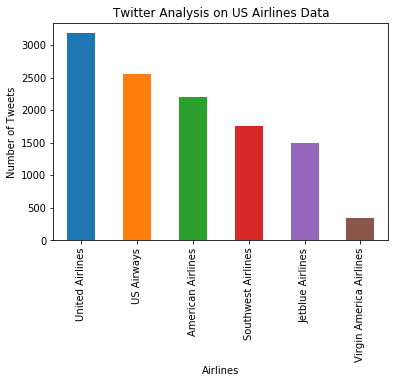

In [8]:
#Visualizing the classification of tweets for the given US airline dataset.  Visualizing only the classified tweets
#and the tweets which wasn't classified, are removed.
airline_classified_df = airlines_tweets[airlines_tweets.Airlines.str.contains("Unknown Classification") == False]
airline_classified_df['Airlines'].value_counts().plot(kind='bar')   
plt.xlabel('Airlines')
plt.ylabel('Number of Tweets')
plt.title('Twitter Analysis on US Airlines Data')

Text(0.5,1,'Split of sentiment on US Airlines Data')

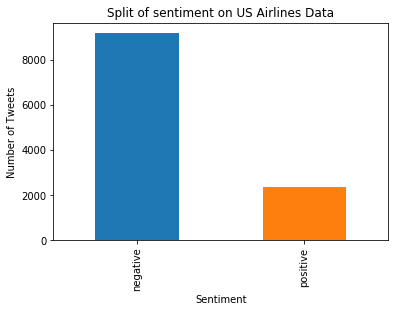

In [9]:
#Visualizing the Split of sentiment on tweets for the given US airline dataset
airline_classified_df['sentiment'].value_counts().plot(kind='bar')   
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.title('Split of sentiment on US Airlines Data')

Positive sentiment on Virgin airlines 44.44444444444444
Positive sentiment on United Airlines 15.733165512901195
Positive sentiment on Southwest Airlines 32.27272727272727
Positive sentiment on Jetblue Airlines 36.229946524064175
Positive sentiment on US Airways 10.550996483001173
Positive sentiment on American Airlines 14.979573309123923


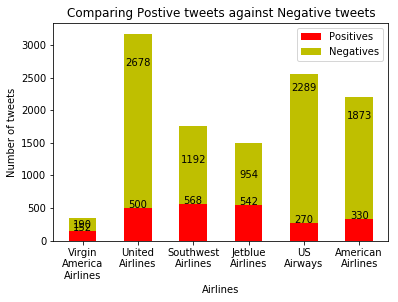

In [10]:
from collections import Counter
#In this cell, we will print and visualize the split of negative and positive tweets for each airlines

count_v = Counter(airline_classified_df.sentiment[airline_classified_df.Airlines=='Virgin America Airlines'])
count_u = Counter(airline_classified_df.sentiment[airline_classified_df.Airlines=='United Airlines'])
count_s = Counter(airline_classified_df.sentiment[airline_classified_df.Airlines=='Southwest Airlines'])
count_j = Counter(airline_classified_df.sentiment[airline_classified_df.Airlines=='Jetblue Airlines'])
count_us = Counter(airline_classified_df.sentiment[airline_classified_df.Airlines=='US Airways'])
count_a = Counter(airline_classified_df.sentiment[airline_classified_df.Airlines=='American Airlines'])

#Printing the positive and negative tweets of each airlines
print("Positive sentiment on Virgin airlines",count_v['positive']/(count_v['positive']+count_v['negative'])*100)
print("Positive sentiment on United Airlines",count_u['positive']/(count_u['positive']+count_u['negative'])*100)
print("Positive sentiment on Southwest Airlines",count_s['positive']/(count_s['positive']+count_s['negative'])*100)
print("Positive sentiment on Jetblue Airlines",count_j['positive']/(count_j['positive']+count_j['negative'])*100)
print("Positive sentiment on US Airways",count_us['positive']/(count_us['positive']+count_us['negative'])*100)
print("Positive sentiment on American Airlines",count_a['positive']/(count_a['positive']+count_a['negative'])*100)

positives = (count_v['positive'],count_u['positive'],count_s['positive'],count_j['positive'],count_us['positive'],count_a['positive'])
negatives = (count_v['negative'],count_u['negative'],count_s['negative'],count_j['negative'],count_us['negative'],count_a['negative'])

N = 6
width = 0.5
ind = np.arange(N)
fig, ax = plt.subplots()
rects1  = plt.bar(ind,positives, width, color='r')
rects2  = plt.bar(ind,negatives, width, color='y', bottom = positives)

# add some text for labels, title and axes ticks
ax.set_ylabel('Number of tweets')
plt.xlabel('Airlines')
ax.set_title('Comparing Postive tweets against Negative tweets')
ax.set_xticks(ind)
ax.set_xticklabels(('Virgin\nAmerica\nAirlines','United\nAirlines','Southwest\nAirlines',
                'Jetblue\nAirlines','US\nAirways','American\nAirlines'))

ax.legend((rects1[0], rects2[0]), ('Positives', 'Negatives'))

#Labelling the bar chart
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height,
                int(height),
                ha='center', va='baseline')

autolabel(rects1)
autolabel(rects2)

#Visualizing the positive and negative tweets of each airlines
plt.show()

In [11]:
#Split of sentiment on the US airline twitter data for 2015
airline_classified_df['sentiment'].value_counts()

negative    9176
positive    2362
Name: sentiment, dtype: int64

In [12]:
#Total tweet counts for individual airlines are printed out
airline_classified_df['Airlines'].value_counts()

United Airlines            3178
US Airways                 2559
American Airlines          2203
Southwest Airlines         1760
Jetblue Airlines           1496
Virgin America Airlines     342
Name: Airlines, dtype: int64

In [13]:
#Following few cells would try to visualize the generic data
#First step would be to load the generic data into a data frame
generic_df = pd.read_csv('generic_tweets.txt', header=0, names=["class","id","date","query","user","text"])
generic_df.head()

,class,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [14]:
#A function is defined to label the emotions as Positive and Negative based on the class column
def add_label(class_value):
    if class_value==4:
        return ('positive')
    elif class_value==0:
        return('negative')
    else:
        return('Undetermined')

#Applying add_label function on the generic data
generic_df['label']= generic_df['class'].apply(add_label)
generic_df.head()

,class,id,date,query,user,text,label
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",negative
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,negative
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,negative
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,negative
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",negative


In [15]:
#Total counts for the given two emotion types are printed out
generic_df['label'].value_counts()

positive    100000
negative    100000
Name: label, dtype: int64

Text(0.5,1,'Twitter Analysis on generic data')

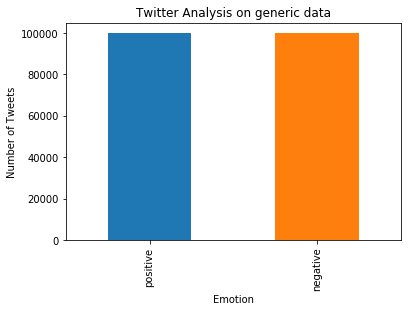

In [16]:
#Visualizing the emotions in terms of a bar plot, this denotes that there is a 50:50 split on the dataset for the given
#2 emotion types
generic_df['label'].value_counts().plot(kind='bar')   
plt.xlabel('Emotion')
plt.ylabel('Number of Tweets')
plt.title('Twitter Analysis on generic data')

## 3. Model Preparation
#### The third part of the assignment consists of below requirements,
#### 1. Feature extraction
#### 2. Create a logistic regression model to predict the emotion of the tweet using generic tweets dataset.  Generic data set should be split into 70% training and 30% testing sets.

In [17]:
#Cleaning the generic tweets dataset using the data cleaning function
normalize_text = np.vectorize(data_cleaning)
processed_generic_data = normalize_text(generic_df.text.tolist())
processed_generic_data

array(['switchfoot awww bummer shoulda david carr third day',
       'upset update facebook texting cry result school today blah',
       'kenichan dived time ball managed save rest bound', ...,
       'okie doke time escape north massa turned folk',
       'finished lesson hooray', 'ppl fucking kp cb laa love boyfriend'],
      dtype='<U136')

In [18]:
#We are going to use TF_IDF feature model to convert the features to numeric vectors.  TF-IDF model prevents
#overshadowing of more frequent features in a large dataset
from sklearn.feature_extraction.text import TfidfVectorizer

#The vectorizer just uses the top 2000 most frequently occuring features in the given generic dataset
vectorizer = TfidfVectorizer(min_df=0., max_df=1., use_idf=True, max_features=2000)
vec_matrix = vectorizer.fit_transform(processed_generic_data)
vec_matrix = vec_matrix.toarray()

#Printing the numeric feature vectors for each individual tweets, and since we considered only the top 2000 features,
#we are left with a feature matrix of size 200000 rows × 2000 columns
vocab = vectorizer.get_feature_names()
pd.DataFrame(np.round(vec_matrix, 2), columns=vocab)

#That concludes the requirement of section 3

,absolutely,abt,access,accident,account,ace,ache,acting,action,ad,...,york,young,youtube,yr,yuck,yum,yummy,yup,zombie,zoo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
#Taking X as the feature vectors and Y as the sentiment type
X = vec_matrix[0:len(generic_df)]    # features for overall data
y = generic_df.label                # targets (sentiment values) for overall data

In [20]:
#import train_test_split
from sklearn.cross_validation import train_test_split

#split the features and targets of classified data into training (70%) and test data (30%) sets
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.3, random_state=0)  

C:\Users\lines\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [21]:
# initiate a logistic regression model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression() 

## 4. Model Implementation
#### The fourth part of the assignment consists of below requirements,
#### 1. Train the logistic regression model created in the last section using the training set.
#### 2. Predict the sentiment for the test data using the model and check the accuracy.
#### 3. Evaluate the same model on the US airline data and discuss about the prediction with the actual sentiment in the given dataset.
#### 4. Split the negative US airline tweets into training data (70%) and test data (30%).
#### 5. Train a multi-class logistic regression model to predict the reason for the negative tweets.

In [22]:
#Train the model using the training set from the generic data
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [23]:
#Predict the sentiment for the test data and check the accuracy of the regression model
from sklearn.metrics import accuracy_score
y_pred_train = classifier.predict(X_test)
print(accuracy_score(y_test, y_pred_train))

#Importing confusion matrix and visualizing the spread of true negatives and positives
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_train)
cm

0.7356166666666667


array([[20669,  9178],
       [ 6685, 23468]], dtype=int64)

In [24]:
#Next, we clean each tweets in the US airline tweets data set
processed_airline_data = normalize_text(airline_classified_df.text.tolist())
actual_sentiment = airline_classified_df.sentiment


#Use the model created using generic tweets dataset on the US airline dataset
airline_pred = vectorizer.transform(processed_airline_data) 
pred_airline = classifier.predict(airline_pred)
print("Model prediction accuracy on Airline tweets using logistic regression",round(accuracy_score(actual_sentiment, pred_airline)*100),"%")

Model prediction accuracy on Airline tweets using logistic regression 72.0 %


In [25]:
#Here, we filter out the positive sentiments from the US airlines data
neg_airline_df = airline_classified_df[airline_classified_df.sentiment.str.contains("negative") == True]
neg_airline_df.head()

,id,sentiment,negative_reason,user,retweet_count,text,Airlines
1,5.703010e+17,negative,Bad Flight,jnardino,0,@VirginAmerica it's really aggressive to blast...,Virgin America Airlines
2,5.703010e+17,negative,Can't Tell,jnardino,0,@VirginAmerica and it's a really big bad thing...,Virgin America Airlines
3,5.703010e+17,negative,Can't Tell,jnardino,0,@VirginAmerica seriously would pay $30 a fligh...,Virgin America Airlines
11,5.702820e+17,negative,Late Flight,smartwatermelon,0,@VirginAmerica SFO-PDX schedule is still MIA.,Virgin America Airlines
13,5.702770e+17,negative,Bad Flight,heatherovieda,0,@VirginAmerica I flew from NYC to SFO last we...,Virgin America Airlines


In [26]:
#Cleaning the negative tweets
processed_neg_airline_data = normalize_text(neg_airline_df.text.tolist())
processed_neg_airline_data

array(['virginamerica aggressive blast obnoxious entertainment guest face recourse',
       'virginamerica big bad thing',
       'virginamerica seriously pay flight seat didn playing bad thing flying va',
       ..., 'americanair cue delay',
       'americanair leaving minute late flight warning communication minute late flight called shitty customer svc',
       'americanair money change flight don answer phone suggestion commitment'],
      dtype='<U130')

In [27]:
#We are going to use TF_IDF feature model to convert the features to numeric vectors.
vectorizer1 = TfidfVectorizer(min_df=0., max_df=1., use_idf=True)
vec_matrix1 = vectorizer1.fit_transform(processed_neg_airline_data)
vec_matrix1 = vec_matrix1.toarray()

#Printing the numeric feature vectors for each individual tweets, feature matrix size = 200000 rows × 2000 columns
vocab1 = vectorizer1.get_feature_names()
pd.DataFrame(np.round(vec_matrix1, 2), columns=vocab1)

,aa,aaaand,aaadvantage,aacustomerservice,aadelay,aadv,aadvantage,aafail,aal,aarp,...,zip,zipper,zkatcher,zombie,zone,zoom,zrh,zukes,zurich,zz
0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
#Taking X as the feature vectors and Y as the negative reason
X1 = vec_matrix1[0:len(neg_airline_df)] 
y1 = neg_airline_df.negative_reason  

#Spliting the negative tweets in 70%training and 30%testing sets
X1_train, X1_test, y1_train, y1_test  = train_test_split(X1, y1, test_size=0.3, random_state=0) 

In [29]:
#We now create a multi-class logistic regression model and use Newton's method to find better approximations on the
#class (negative reasons).  
#For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss.
multi_classifier = LogisticRegression(multi_class='multinomial', solver='newton-cg') 

#Training the multi-class model
multi_classifier.fit(X1_train, y1_train)

#Predicting the test data using the multi-class model
y1_pred_train = multi_classifier.predict(X1_test)

#Printing the accuracy score of the model
print(accuracy_score(y1_test, y1_pred_train))

0.610606610969851


In [30]:
#We now use classification report to print out the precision of the prediction
#The reported averages include micro average (averaging the total true positives, 
#false negatives and false positives), macro average (averaging the unweighted mean per label),
#weighted average (averaging the support-weighted mean per label) and 
#sample average (only for multilabel classification)
from sklearn.metrics import classification_report
print(classification_report(y1_test, y1_pred_train))

                             precision    recall  f1-score   support

                 Bad Flight       0.62      0.29      0.40       196
                 Can't Tell       0.44      0.49      0.46       343
           Cancelled Flight       0.81      0.64      0.71       242
     Customer Service Issue       0.58      0.84      0.68       872
            Damaged Luggage       0.00      0.00      0.00        20
Flight Attendant Complaints       0.65      0.20      0.30       157
    Flight Booking Problems       0.73      0.21      0.32       153
                Late Flight       0.68      0.74      0.71       499
               Lost Luggage       0.77      0.62      0.69       222
                  longlines       0.33      0.02      0.04        49

                avg / total       0.62      0.61      0.58      2753



C:\Users\lines\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [31]:
#Here we use the confusion matrix to show the actual and predicted counts.  The diagonal of the confusion matrix shows
#the true matchings
cm_df = pd.DataFrame(confusion_matrix(y1_test, y1_pred_train, 
                       labels=['Bad Flight', 'Cant Tell', 'Late Flight', 
                               'Customer Service Issue', 'Flight Booking Problems',
                               'Lost Luggage','Flight Attendant Complaints','Cancelled Flight',
                               'Damaged Luggage','longlines']),
                   index=['true:Bad Flight','true:Cant Tell','true:Late Flight',
                          'true:Customer Service Issue','true:Flight Booking Problems',
                          'true:Lost Luggage','true:Flight Attendant Complaints','true:Cancelled Flight',
                          'true:Damaged Luggage','true:longlines'], columns=['pred:Bad Flight','pred:Cant Tell','pred:Late Flight',
                          'pred:Customer Service Issue','pred:Flight Booking Problems',
                          'pred:Lost Luggage','pred:Flight Attendant Complaints','pred:Cancelled Flight',
                          'pred:Damaged Luggage','pred:longlines'])

cm_df

,pred:Bad Flight,pred:Cant Tell,pred:Late Flight,pred:Customer Service Issue,pred:Flight Booking Problems,pred:Lost Luggage,pred:Flight Attendant Complaints,pred:Cancelled Flight,pred:Damaged Luggage,pred:longlines
true:Bad Flight,57,0,42,55,1,5,1,0,0,0
true:Cant Tell,0,0,0,0,0,0,0,0,0,0
true:Late Flight,4,0,370,75,0,3,4,12,0,0
true:Customer Service Issue,6,0,35,731,8,8,5,10,0,0
true:Flight Booking Problems,2,0,7,81,32,0,0,5,0,0
true:Lost Luggage,2,0,13,48,0,137,2,3,0,0
true:Flight Attendant Complaints,9,0,22,67,1,5,31,1,0,2
true:Cancelled Flight,1,0,16,55,1,2,0,155,0,0
true:Damaged Luggage,0,0,2,5,0,8,1,0,0,0
true:longlines,0,0,18,20,0,6,1,3,0,1


## 5. Discussion

#### Topics to be discussed,
####     a. Answer, "What can public opinion on Twitter tell us about the US airlines in 2015?"
        It is clear from the below prediction that, customers are unhappy on the Airlines services for various reasons.
        negative    9176
        positive    2362
        
####     b. Describe the results of the analysis and discuss your interpretation of the results.
        United Airlines            3178
        US Airways                 2559
        American Airlines          2203
        Southwest Airlines         1760
        Jetblue Airlines           1496
        Virgin America Airlines     342

        United Airlines are tagged in most tweets followed by US Airways and American Airlines
        
        Generic data is split into 50% positive and 50% negative tweets.
        
        First Model:
        Logistic regression Model trained on generic tweets has a prediction accuracy of 74%.
        Logistic regression Model trained on generic tweets has a prediction accuracy of 72% on Airline tweets.
        
        Second Model:
        Multi-class Logistic regression Model trained on airline tweets has a prediction accuracy of 61%.
        
####     c. Explain how each airline is viewed in the public eye based on the sentiment value.
        Positive sentiment on Virgin airlines 44.44444444444444
        Positive sentiment on United Airlines 15.733165512901195
        Positive sentiment on Southwest Airlines 32.27272727272727
        Positive sentiment on Jetblue Airlines 36.229946524064175
        Positive sentiment on US Airways 10.550996483001173
        Positive sentiment on American Airlines 14.979573309123923
        
        Based on the above simple classification, Virgin airlines has close to 50% approval or positivity from customers, however the total number of tweets for Virgin airlines is substantially low, thereby it could be said that Virgin airlines has a decent approval rate and not so often flagged by the customers.
        
        However, on the contrary US Airways, United Airlines and American Airlines has very low approval rate from customers based on their tweets.

####     d. For your second model, if there are any tweets for which the model failed to predict the correct negative reason, explain why.      Justify your explanation with a few examples from the test sets.      
        From the classification report, it could be inferred that occurences of tweets having 'damaged luggage' is very low and leading to a structural weakness in the predicted scores of the classifier.
        
        However, based on the report, 'Cancelled Flight', 'Late Flight' and 'Lost Luggage' were predicted with above average precision.  But, reasons such as 'Flight Booking Problems' and 'Flight Attendant Complaints' has higher precision but low recall, which means it has not classified few instances.
        
                                    precision   recall  f1-score   support

                     Bad Flight       0.62      0.29      0.40       196
                     Can't Tell       0.44      0.49      0.46       343
               Cancelled Flight       0.81      0.64      0.71       242
         Customer Service Issue       0.58      0.84      0.68       872
                Damaged Luggage       0.00      0.00      0.00        20
    Flight Attendant Complaints       0.65      0.20      0.30       157
        Flight Booking Problems       0.73      0.21      0.32       153
                    Late Flight       0.68      0.74      0.71       499
                   Lost Luggage       0.77      0.62      0.69       222
                      longlines       0.33      0.02      0.04        49

        
####     e. For both models, suggest one way you can improve the accuracy of your models.
        * One of the methods to increase the accuracy would be to perform hyperparmeter tuning such as, grid search, random search and bayesian optimization.
        * Next, most common method would be to perform feature engineering, where new features could be derived/engineered based on the existing ones.
        * Feature selection would prove helpful to find the features which creates higher impact on the target variable(s).
        * The machince learning algorithm itself, plays a vital role in creating a robust model, but the intuition is based on proper domain, test knowledge and experience.
        * Bootstrap Aggregating and Boosting and it is common practice to use ensemble methods to increase accuracy of the model.

    

## Bonus

### 1. Classification using Naive Bayes

In [32]:
#For first bonus part, we are going to use Naive bayes, Naive bayes classifier (nb) will be used to 
#train and test the model
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train)

GaussianNB(priors=None)

In [33]:
#validate the nb model using test data and show accuracy score
y_pred_train_nb = classifier_nb.predict(X_test)
print(accuracy_score(y_test, y_pred_train_nb))

0.6943


In [34]:
#validate the nb model trained on generic data on the airline data and print the accuracy
pred_airline_nb = classifier_nb.predict(airline_pred.toarray())
print("GaussianNB Model prediction accuracy on Airline tweets",round(accuracy_score(actual_sentiment, pred_airline_nb)*100),"%")

GaussianNB Model prediction accuracy on Airline tweets 63.0 %


### 2. Classification using decision tree

In [35]:
#For second bonus part, we are going to use decision tree classification, decision tree classifier (dtc) will be used to 
#train and test the model
from sklearn.tree import DecisionTreeClassifier

#criterion is a function to measure the quality of split and 'entropy' for information gain
classifier_dtc = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [36]:
#validate the dtc model using test data and show accuracy score
y_pred_train_dtc = classifier_dtc.predict(X_test)
print(accuracy_score(y_test, y_pred_train_dtc))

0.6772166666666667


In [37]:
#validate the dtc model trained on generic data on the airline data and print the accuracy
pred_airline_dtc = classifier_dtc.predict(airline_pred)
print("DTC Model prediction accuracy on Airline tweets",round(accuracy_score(actual_sentiment, pred_airline_dtc)*100),"%")

DTC Model prediction accuracy on Airline tweets 64.0 %


######  For Bonus part, classification using Naive Bayes and decision tree is performed

    In the bonus part, am trying to using Naive bayes and decision treen model to train on the generic data (70% training and 30% test) and have used the same model to predict the sentiment of airline tweets.

For Logistic Regression Model:
            
        The Acuuracy is 74% (It can be said that logistic regression performs better)

For Naive Bayes Model:

        The Acuuracy is 69%

For Decision Tree Classification Model:

        The Acuuracy is 68%

    Pros each Model:
    ----------------
    Logistic Regression Model:

            Probabilistic approach, gives informations about statistical significance of features

    Naive Bayes Model:

            Efficient, not biased by outliers, works on nonlinear problems, probabilistic approach

    Decision Tree Classification Model:

            Interpretability, no need for feature scaling, works on both linear / nonlinear problems
            

    Cons each Model:
    ----------------

    Logistic Regression Model:

            The Logistic Regression Assumptions like linearity, normality, homoscedasticity etc

    Naive Bayes Model:

            Based on the assumption that features have same statistical relevance

    Decision Tree Classification Model:

            Poor results on too small datasets, overfitting can easily occur